<a href="https://colab.research.google.com/github/yeb2Binfang/ECE-GY9143HPML/blob/main/Lab/Lab3/Lab3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recall the cyclical learning rate policy discussed in the class. The learning rate changes in a cyclical manner between lrmin and lrmax, which are hyperparameters that need to be specified. For this problem, you first need to read carefully the article referenced below as you will be making use of the code there (in Keras) and modifying it as needed. For those who want to work in Pytorch, there are open source implementations of this policy available which you can easily search for and build over them. You will work with the FashionMNIST dataset and MiniGoogLeNet (described in reference).

1. Fix batch size to 64 and start with 10 candidate learning rates between $10^{−9}$ and $10^1$ and train your model for 5 epochs. Plot the training loss as a function of the learning rate. You should see a curve like Figure 3 in the reference below. From that figure identify the values of $lr_{min}$ and $lr_{max}$. (2)
2. Use the cyclical learning rate policy (with exponential decay) and train your network using batch size 64 and $lr_{min}$ and $lr_{max}$ values obtained in part 1. Plot train/validation loss and accuracy curve (similar to Figure 4 in reference). (3)
3. We want to test if increasing batch size for a fixed learning rate has the same effect as decreasing learning rate for fixed batch size. Fix learning rate to $lr_{max}$ and train your network starting with batch size 32 and incrementally going up to 16384 (in increments of a factor of 2; like 32, 64...). You can choose a step size (in terms of the number of iterations) to increment the batch size. If your GPU cannot handle large batch sizes, you need to employ an effective batch size approach as discussed in Lecture 3 to simulate large batches. Plot the training loss. Is the generalization of your final model similar or different from than cyclical learning rate policy? (10)

*reference:*

* Leslie N. Smith Cyclical Learning Rates for Training Neural Networks. Available at https://arxiv.org/abs/1506.01186.
* Keras implementation of cyclical learning rate policy. Available at https://www.pyimagesearch.com/2019/08/05/keras-learning-rate-finder/

In [2]:
!wget https://raw.githubusercontent.com/yeb2Binfang/ECE-GY9143HPML/main/Lab/Lab3/minigooglenet.py

--2022-03-28 01:52:34--  https://raw.githubusercontent.com/yeb2Binfang/ECE-GY9143HPML/main/Lab/Lab3/minigooglenet.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4251 (4.2K) [text/plain]
Saving to: ‘minigooglenet.py’

minigooglenet.py    100%[===================>]   4.15K  --.-KB/s    in 0s      

2022-03-28 01:52:35 (49.1 MB/s) - ‘minigooglenet.py’ saved [4251/4251]



In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from minigooglenet import MiniGoogLeNet

In [4]:
batch_size = 64
#Loading the dataset and preprocessing
train_dataset = torchvision.datasets.FashionMNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.5,), std = (0.5,))]),
                                           download = True)


test_dataset = torchvision.datasets.FashionMNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.5,), std = (0.5,))]),
                                          download=True)


train_loader= torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



--2022-03-28 01:44:02--  https://raw.githubusercontent.com/yeb2Binfang/ECE-GY9143HPML/main/Lab/Lab3/minigooglenet.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4251 (4.2K) [text/plain]
Saving to: ‘minigooglenet.py.1’

minigooglenet.py.1  100%[===================>]   4.15K  --.-KB/s    in 0s      

2022-03-28 01:44:02 (31.3 MB/s) - ‘minigooglenet.py.1’ saved [4251/4251]



In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [10]:
net = MiniGoogLeNet(10, 28, 1)

In [11]:
from torchsummary import summary
summary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 28, 28]             864
       BatchNorm2d-2           [-1, 96, 28, 28]             192
       BasicConv2d-3           [-1, 96, 28, 28]               0
            Conv2d-4           [-1, 32, 28, 28]           3,072
       BatchNorm2d-5           [-1, 32, 28, 28]              64
       BasicConv2d-6           [-1, 32, 28, 28]               0
            Conv2d-7           [-1, 32, 28, 28]          27,648
       BatchNorm2d-8           [-1, 32, 28, 28]              64
       BasicConv2d-9           [-1, 32, 28, 28]               0
  InceptionModule-10           [-1, 64, 28, 28]               0
           Conv2d-11           [-1, 32, 28, 28]           2,048
      BatchNorm2d-12           [-1, 32, 28, 28]              64
      BasicConv2d-13           [-1, 32, 28, 28]               0
           Conv2d-14           [-1, 48,

In [12]:
training_data = enumerate(train_loader)
batch_idx, (images, labels) = next(training_data)
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


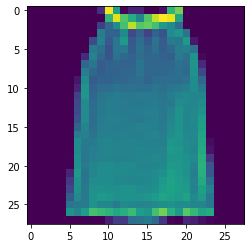

In [13]:
plt.imshow(images[0].squeeze())

## Problem 1
Fix batch size to 64 and start with 10 candidate learning rates between $10^{−9}$ and $10^1$ and train your model for 5 epochs. Plot the training accuracy as a function of the learning rate. You should see a curve like Figure 3 in the reference below. From that figure identify the values of $lr_{min}$ and $lr_{max}$. (2)

In [6]:
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9,0.999))

In [7]:
def train(model, epoch, optimizer, train_loader, test_loader, train_acc):   
    model.train()
    correct = 0
    total = 0
    
    # training our model
    for epo in range(epoch):
      print("{} epoch".format(epo))
      for batch_idx, (image, label) in enumerate(train_loader):
        image, label = image.to(device), label.to(device)
        optimizer.zero_grad()
        pred = model(image)

        loss = loss_fn(pred, label)

        loss.backward()
        optimizer.step()
    
    model.eval()
    for batch_idx, (image, label) in enumerate(test_loader):
      image, label = image.to(device), label.to(device)
      pred = model(image)

      _, predicted = pred.max(1)
      total += label.size(0)
      correct += predicted.eq(label).sum().item() 
    train_acc.append(100. * correct / total)
    print(100. * correct / total)

In [8]:
learning_rate = np.linspace(1e-9, 10, 10)

In [9]:
train_acc = []
for learn_rate in learning_rate:
  model = MiniGoogLeNet(10, 28, 1)
  optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate, betas=(0.9,0.999)) 
  model.to(device)
  train(model, 5, optimizer, train_loader, test_loader, train_acc)

0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
9.24
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
10.0
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
10.0
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
10.0
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
10.0
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
10.0
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
10.0
0 epoch
1 epoch
2 epoch
3 epoch
4 epoch
10.0
0 epoch
1 epoch


KeyboardInterrupt: ignored

## Problem 2
Use the cyclical learning rate policy (with exponential decay) and train your network using batch size 64 and  lrmin  and  lrmax  values obtained in part 1. Plot train/validation loss and accuracy curve (similar to Figure 4 in reference). (3)

In [ ]:
def train_with_lr(model, epoch, optimizer, scheduler, train_loader, test_loader, train_acc_history, train_loss_history):   
    model.train()
    
    # training our model
    for epo in range(epoch):
      print("{} epoch".format(epo))
      correct = 0
      total = 0
      for batch_idx, (image, label) in enumerate(train_loader):
        image, label = image.to(device), label.to(device)
        optimizer.zero_grad()
        pred = model(image)

        loss = loss_fn(pred, label)
        loss.backward()
        optimizer.step()
        scheduler.step()
        train_loss_history.append(loss.item())
    
        model.eval()

        _, predicted = pred.max(1)
        total += label.size(0)
        correct += predicted.eq(label).sum().item() 
        train_acc_history.append(100. * correct / total)
    #print(100. * correct / total)

In [ ]:
train_acc_history = []
train_loss_history = []
model = MiniGoogLeNet(10, 28, 1)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.01, max_lr=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate, betas=(0.9,0.999)) 
model.to(device)
train_with_lr(model, 5, optimizer, train_loader, test_loader, train_acc_history, train_loss_history)


## Problem 3
We want to test if increasing batch size for a fixed learning rate has the same effect as decreasing learning rate for fixed batch size. Fix learning rate to $lr_{max}$ and train your network starting with batch size 32 and incrementally going up to 16384 (in increments of a factor of 2; like 32, 64...). You can choose a step size (in terms of the number of iterations) to increment the batch size. If your GPU cannot handle large batch sizes, you need to employ an effective batch size approach as discussed in Lecture 3 to simulate large batches. Plot the training loss. Is the generalization of your final model similar or different from than cyclical learning rate policy? (10)